In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

import tensorflow as tf

2022-08-21 12:49:44.873416: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-21 12:49:44.873665: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### **We are going to use 60 min wind Energy Generation data and also temperature data to predict the energy generation.**


- import dateset from local storage and load it into a pandas dataframe with considering the date column in utc format
- check the dataframe
- check the dataframe and see if there are any missing values

### Import Time Series 60min data and parse the date column to datetime format

In [3]:
data_ts = pd.read_csv(
    "../../Dataset/wind_energy/time_series_60min_singleindex.csv",
    parse_dates=["utc_timestamp"],
)
data_ts["utc_timestamp"] = pd.to_datetime(data_ts["utc_timestamp"])
data_ts

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 00:00:00+00:00,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 01:00:00+00:00,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01 02:00:00+00:00,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01 03:00:00+00:00,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50396,2020-09-30 19:00:00+00:00,2020-09-30T21:00:00+0200,6661.0,6656.0,NaN,NaN,1847.0,9402.0,9720.0,NaN,...,1506.95,1530.0,5.32,0.44,3324.0,3170.0,1.7,1.1,NaN,NaN
50397,2020-09-30 20:00:00+00:00,2020-09-30T22:00:00+0200,6336.0,6310.0,NaN,NaN,1723.0,9219.0,9418.0,NaN,...,1391.15,1388.0,5.57,0.62,3099.0,3010.0,1.7,1.0,NaN,NaN
50398,2020-09-30 21:00:00+00:00,2020-09-30T23:00:00+0200,5932.0,5813.0,NaN,NaN,1771.0,8763.0,8873.0,NaN,...,1250.17,1274.0,5.58,0.66,2940.0,2890.0,1.6,1.0,NaN,NaN
50399,2020-09-30 22:00:00+00:00,2020-10-01T00:00:00+0200,5628.0,5424.0,NaN,NaN,1779.0,8131.0,8285.0,NaN,...,1206.82,1178.0,5.61,0.21,2823.0,2740.0,1.7,1.2,NaN,NaN


### Import Weather Data and parse the date column to datetime format

In [4]:
data_w = pd.read_csv(
    "../../Dataset/wind_energy/weather_data.csv", parse_dates=["utc_timestamp"]
)
data_w["utc_timestamp"] = pd.to_datetime(data_w["utc_timestamp"])
data_w

,utc_timestamp,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,BG_temperature,BG_radiation_direct_horizontal,BG_radiation_diffuse_horizontal,...,RO_radiation_diffuse_horizontal,SE_temperature,SE_radiation_direct_horizontal,SE_radiation_diffuse_horizontal,SI_temperature,SI_radiation_direct_horizontal,SI_radiation_diffuse_horizontal,SK_temperature,SK_radiation_direct_horizontal,SK_radiation_diffuse_horizontal
0,1980-01-01 00:00:00+00:00,-3.640,0.0,0.0,-0.720,0.0,0.0,4.664,0.0,0.0,...,0.0,-3.945,0.0,0.0,-3.055,0.0,0.0,-4.648,0.0,0.0
1,1980-01-01 01:00:00+00:00,-3.803,0.0,0.0,-1.165,0.0,0.0,4.052,0.0,0.0,...,0.0,-4.053,0.0,0.0,-3.272,0.0,0.0,-4.554,0.0,0.0
2,1980-01-01 02:00:00+00:00,-3.969,0.0,0.0,-1.434,0.0,0.0,3.581,0.0,0.0,...,0.0,-4.129,0.0,0.0,-3.639,0.0,0.0,-4.455,0.0,0.0
3,1980-01-01 03:00:00+00:00,-4.076,0.0,0.0,-1.843,0.0,0.0,3.197,0.0,0.0,...,0.0,-4.139,0.0,0.0,-4.202,0.0,0.0,-4.421,0.0,0.0
4,1980-01-01 04:00:00+00:00,-4.248,0.0,0.0,-2.094,0.0,0.0,2.750,0.0,0.0,...,0.0,-4.239,0.0,0.0,-4.732,0.0,0.0,-4.449,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350635,2019-12-31 19:00:00+00:00,-1.386,0.0,0.0,1.684,0.0,0.0,-1.351,0.0,0.0,...,0.0,-0.382,0.0,0.0,0.053,0.0,0.0,-0.766,0.0,0.0
350636,2019-12-31 20:00:00+00:00,-1.661,0.0,0.0,1.718,0.0,0.0,-1.009,0.0,0.0,...,0.0,-0.418,0.0,0.0,-0.207,0.0,0.0,-0.742,0.0,0.0
350637,2019-12-31 21:00:00+00:00,-1.986,0.0,0.0,1.726,0.0,0.0,-0.986,0.0,0.0,...,0.0,-0.490,0.0,0.0,-0.203,0.0,0.0,-0.764,0.0,0.0
350638,2019-12-31 22:00:00+00:00,-2.184,0.0,0.0,1.569,0.0,0.0,-1.270,0.0,0.0,...,0.0,-0.434,0.0,0.0,-0.032,0.0,0.0,-0.867,0.0,0.0


In [5]:
vars = [
    "utc_timestamp",
    "DE_wind_capacity",
    "DE_wind_generation_actual",
    "DE_wind_offshore_capacity",
    "DE_wind_offshore_generation_actual",
    "DE_wind_onshore_capacity",
    "DE_wind_onshore_generation_actual",
]

In [6]:
vars2 = ["utc_timestamp", "DE_temperature"]

In [7]:
data_ts2 = data_ts[vars]
data_w2 = data_w[vars2]

data_ts2
data_w2

,utc_timestamp,DE_temperature
0,1980-01-01 00:00:00+00:00,-1.261
1,1980-01-01 01:00:00+00:00,-1.414
2,1980-01-01 02:00:00+00:00,-1.571
3,1980-01-01 03:00:00+00:00,-1.760
4,1980-01-01 04:00:00+00:00,-1.995
...,...,...
350635,2019-12-31 19:00:00+00:00,0.767
350636,2019-12-31 20:00:00+00:00,0.656
350637,2019-12-31 21:00:00+00:00,0.476
350638,2019-12-31 22:00:00+00:00,0.226


- converting dataset from hourly to daily because hourly data is too noisy!!

In [8]:
data_ts3 = data_ts2.resample("24H", on="utc_timestamp").agg(
    {
        "DE_wind_generation_actual": np.sum,
        "DE_wind_capacity": np.mean,
        "DE_wind_offshore_capacity": np.mean,
        "DE_wind_offshore_generation_actual": np.sum,
        "DE_wind_onshore_capacity": np.mean,
        "DE_wind_onshore_generation_actual": np.sum,
    }
)

# data_ts3["utc_timestamp"] = data_ts3.index
data_ts3 = data_ts3.reset_index()
# data_ts3  = data_ts3.drop(['utc_timestamp'], axis = 1)
data_ts3

,utc_timestamp,DE_wind_generation_actual,DE_wind_capacity,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual
0,2014-12-31 00:00:00+00:00,0.0,27913.000000,667.000,0.0,27246.000000,0.0
1,2015-01-01 00:00:00+00:00,325165.0,27913.541667,667.000,12297.0,27246.541667,312868.0
2,2015-01-02 00:00:00+00:00,603554.0,27926.000000,667.000,10533.0,27259.000000,593022.0
3,2015-01-03 00:00:00+00:00,462955.0,27926.000000,667.000,12125.0,27259.000000,450829.0
4,2015-01-04 00:00:00+00:00,385023.0,27926.541667,667.125,11500.0,27259.375000,373525.0
...,...,...,...,...,...,...,...
2096,2020-09-26 00:00:00+00:00,392014.0,NaN,NaN,73112.0,NaN,318904.0
2097,2020-09-27 00:00:00+00:00,186522.0,NaN,NaN,78260.0,NaN,108265.0
2098,2020-09-28 00:00:00+00:00,74012.0,NaN,NaN,17853.0,NaN,56155.0
2099,2020-09-29 00:00:00+00:00,73214.0,NaN,NaN,19290.0,NaN,53928.0


In [9]:
data_w3 = data_w2.resample("24H", on="utc_timestamp").agg({"DE_temperature": np.mean})
data_w3 = data_w3.reset_index()
# data_w3["utc_timestamp"] = data_w3.index
# data_w3  = data_w3.drop(['utc_timestamp'], axis = 1)

In [29]:
data = pd.merge(data_ts3, data_w3, on="utc_timestamp")
cols = []
for col in data.columns:
    if col != "utc_timestamp":
        cols.append(col[3:])
    else:
        cols.append("utc_timestamp")
data.columns = cols





In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 0 to 1826
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   utc_timestamp                    1827 non-null   datetime64[ns, UTC]
 1   wind_generation_actual           1827 non-null   float64            
 2   wind_capacity                    1826 non-null   float64            
 3   wind_offshore_capacity           1826 non-null   float64            
 4   wind_offshore_generation_actual  1827 non-null   float64            
 5   wind_onshore_capacity            1826 non-null   float64            
 6   wind_onshore_generation_actual   1827 non-null   float64            
 7   temperature                      1827 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 128.5 KB


- There are some missing data which we can remove because missing data value is very less so it doesn't affect the model that much.


In [12]:
data.isnull().sum() * 100 / data.shape[0]

utc_timestamp                      0.000000
wind_generation_actual             0.000000
wind_capacity                      0.054735
wind_offshore_capacity             0.054735
wind_offshore_generation_actual    0.000000
wind_onshore_capacity              0.054735
wind_onshore_generation_actual     0.000000
temperature                        0.000000
dtype: float64

In [13]:
data.isna().sum()

utc_timestamp                      0
wind_generation_actual             0
wind_capacity                      1
wind_offshore_capacity             1
wind_offshore_generation_actual    0
wind_onshore_capacity              1
wind_onshore_generation_actual     0
temperature                        0
dtype: int64

In [14]:
data = data.fillna(0)
data.isna().sum()

utc_timestamp                      0
wind_generation_actual             0
wind_capacity                      0
wind_offshore_capacity             0
wind_offshore_generation_actual    0
wind_onshore_capacity              0
wind_onshore_generation_actual     0
temperature                        0
dtype: int64

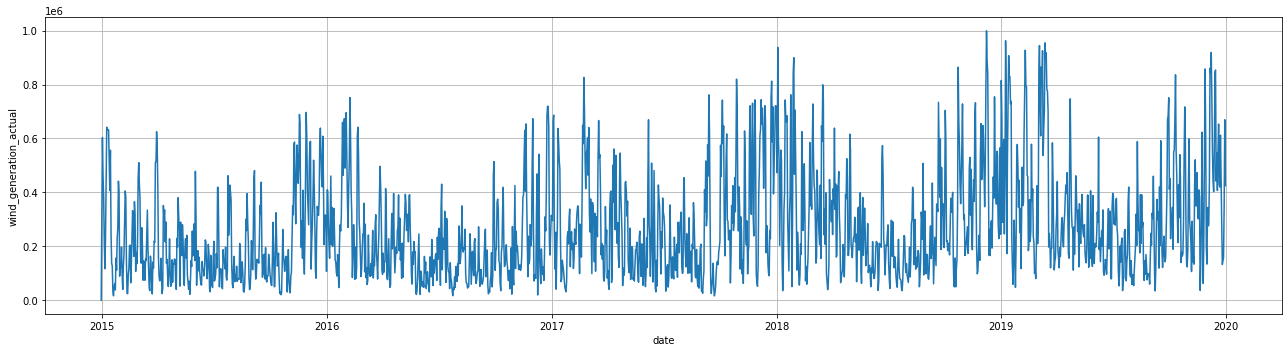

In [15]:
fig, ax = plt.subplots(figsize=(18, 5))
# one_year = data[(data["utc_timestamp"] > '2018-12-30 22:00:00+00:00') & (data["utc_timestamp"] <= '2019-12-30 22:00:00+00:00')]
ax.plot((data["utc_timestamp"]), data["wind_generation_actual"])
ax.grid()
ax.set_ylabel("wind_generation_actual")
ax.set_xlabel("date")
fig.tight_layout()
plt.show()

- let's try to get some more intuitions correlation between the variables using Heatmap


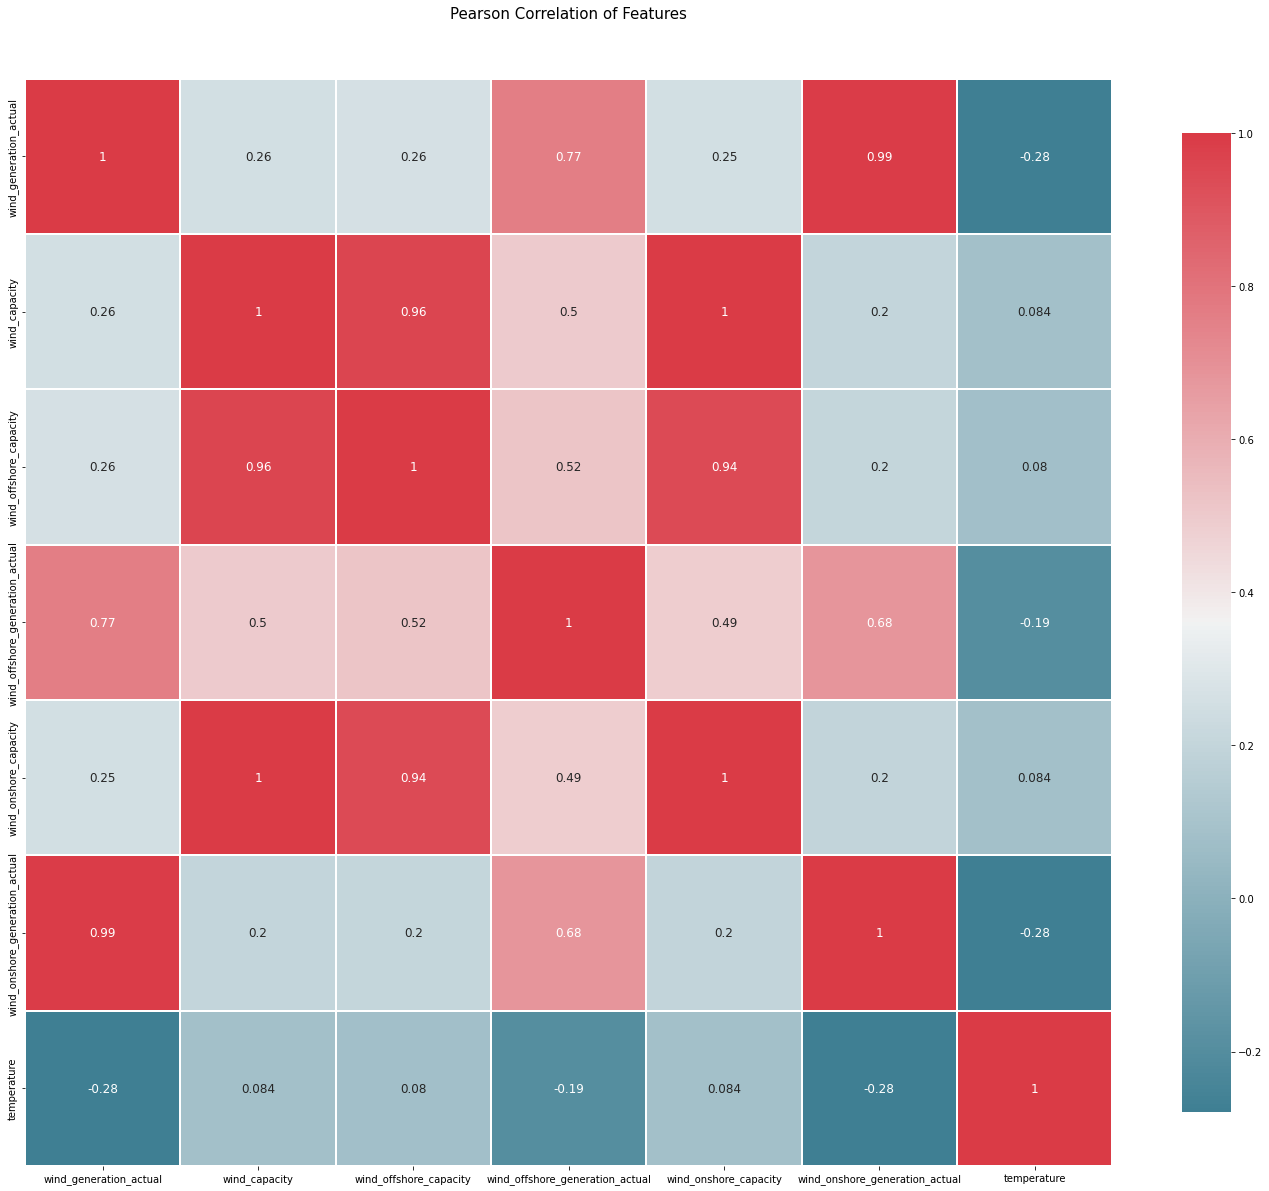

In [16]:
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(25, 20))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    _ = sns.heatmap(
        df.corr(),
        cmap=colormap,
        square=True,
        cbar_kws={"shrink": 0.9},
        ax=ax,
        annot=True,
        linewidths=0.1,
        vmax=1.0,
        linecolor="white",
        annot_kws={"fontsize": 12},
    )

    plt.title("Pearson Correlation of Features", y=1.05, size=15)


correlation_heatmap(data)

# Feature engineering
[Usefull link](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114)



- https://www.analyticsvidhya.com/blog/2021/11/basic-understanding-of-time-series-modelling-with-auto-arimax/
(inspired by this article for Feature engineering)

create new features such as year or month and shifted versions of original features [lag features](https://machinelearningmastery.com/basic-feature-engineering-time-series-data-python/#:~:text=the%20next%20section.-,Lag%20Features,transformed%20into%20supervised%20learning%20problems.&text=The%20Pandas%20library%20provides%20the,from%20a%20time%20series%20dataset).
Lag features are the classical way that time series forecasting problems are transformed into supervised learning problems. The Pandas library provides the shift() function to help create these shifted or lag features from a time series dataset.

In [17]:
def feature_engineering(data):
    
    data["utc_timestamp"] = pd.to_datetime(data["utc_timestamp"], format="%Y-%m-%d")
    data["year"] = data["utc_timestamp"].dt.year
    data["month"] = data["utc_timestamp"].dt.month
    
    lag_features = ["wind_generation_actual"]
    window1 = 2
    window2 = 3
    window3 = 7

    data_rolled_2d = data[lag_features].rolling(window=window1, min_periods=0)
    data_rolled_3d = data[lag_features].rolling(window=window2, min_periods=0)
    data_rolled_7d = data[lag_features].rolling(window=window3, min_periods=0)

    #mean  of all  
    data_mean_2d = data_rolled_2d.mean().shift(1)
    data_mean_3d = data_rolled_3d.mean().shift(1)
    data_mean_7d = data_rolled_7d.mean().shift(1)
    
    #std of all 
    data_std_2d = data_rolled_2d.std().shift(1)
    data_std_3d = data_rolled_3d.std().shift(1)
    data_std_7d = data_rolled_7d.std().shift(1)
    

    #loop for implimentation 
    for feature in lag_features:
        data[f"{feature}_mean_lag{window1}"] = data_mean_2d[feature]
        data[f"{feature}_mean_lag{window2}"] = data_mean_3d[feature]
        data[f"{feature}_mean_lag{window3}"] = data_mean_7d[feature]

        data[f"{feature}_std_lag{window1}"] = data_std_2d[feature]
        data[f"{feature}_std_lag{window2}"] = data_std_3d[feature]
        data[f"{feature}_std_lag{window3}"] = data_std_7d[feature]

    data.fillna(data.mean(), inplace=True)
    
feature_engineering(data)

In [18]:
data

%store data



Stored 'data' (DataFrame)


In [19]:
data.isnull().sum()

utc_timestamp                       0
wind_generation_actual              0
wind_capacity                       0
wind_offshore_capacity              0
wind_offshore_generation_actual     0
wind_onshore_capacity               0
wind_onshore_generation_actual      0
temperature                         0
year                                0
month                               0
wind_generation_actual_mean_lag2    0
wind_generation_actual_mean_lag3    0
wind_generation_actual_mean_lag7    0
wind_generation_actual_std_lag2     0
wind_generation_actual_std_lag3     0
wind_generation_actual_std_lag7     0
dtype: int64

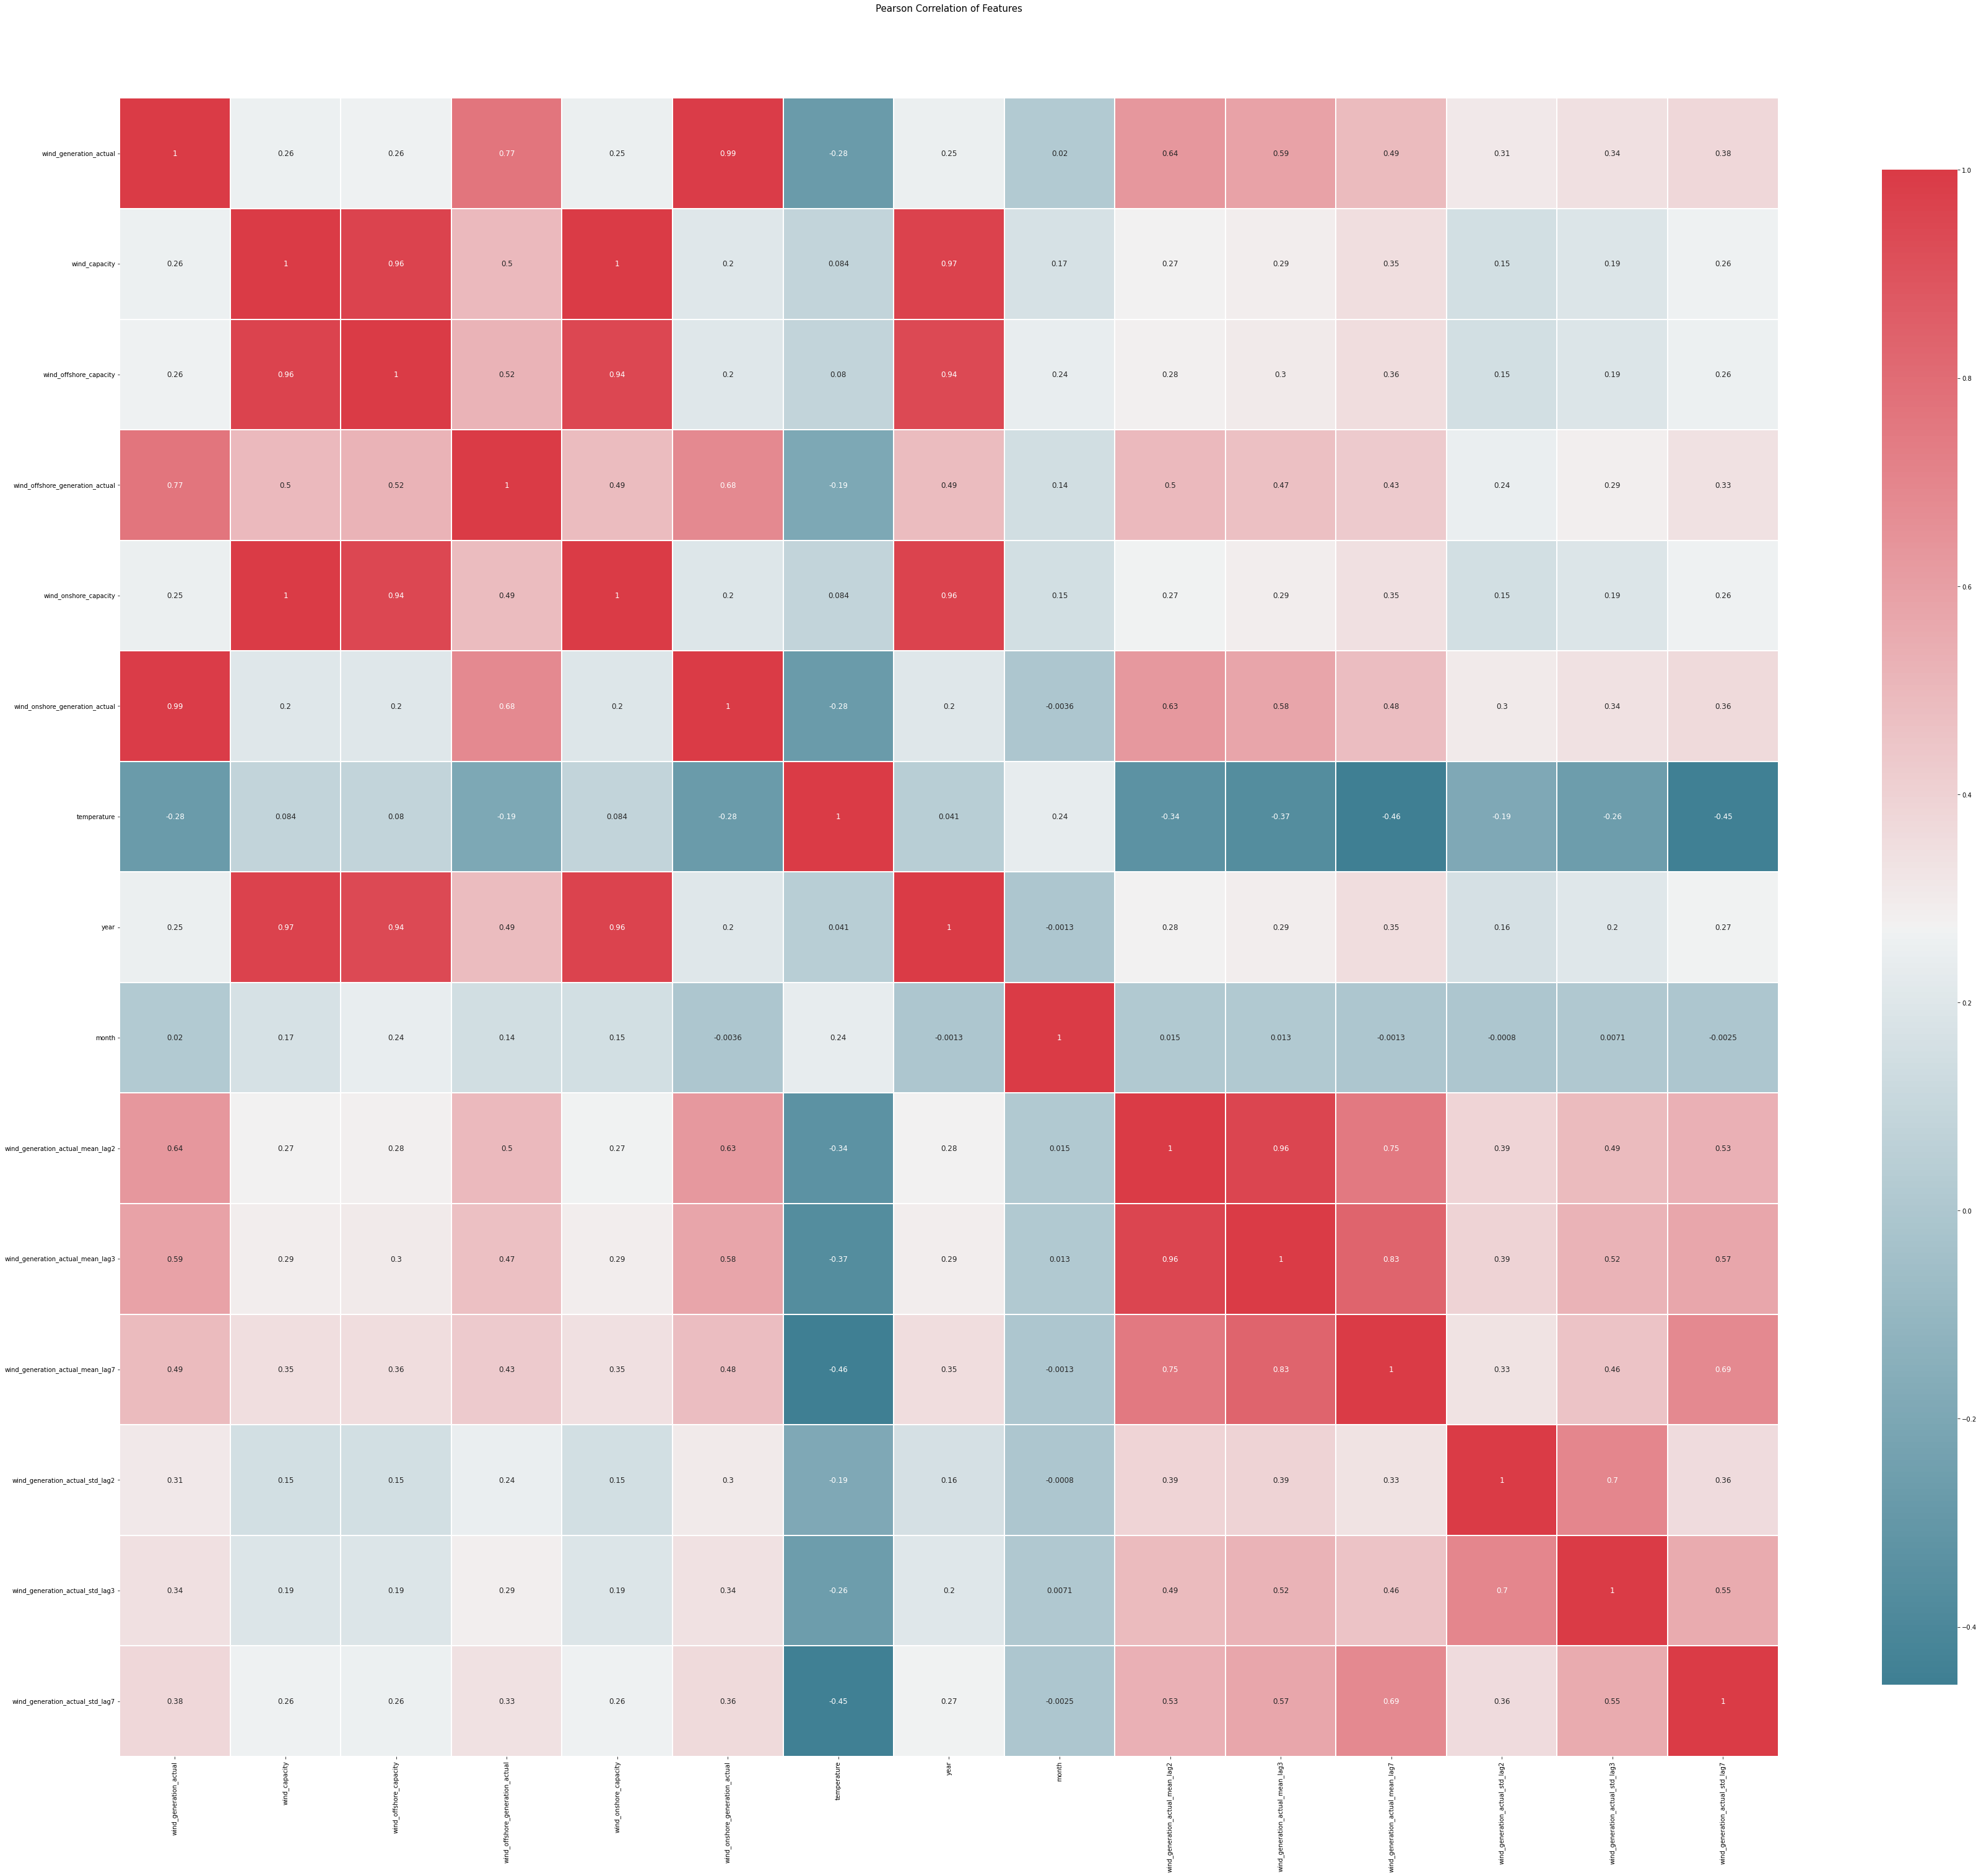

In [20]:
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(60, 50))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    _ = sns.heatmap(
        df.corr(),
        cmap=colormap,
        square=True,
        cbar_kws={"shrink": 0.9},
        ax=ax,
        annot=True,
        linewidths=0.1,
        vmax=1.0,
        linecolor="white",
        annot_kws={"fontsize": 12},
    )

    plt.title("Pearson Correlation of Features", y=1.05, size=15)


correlation_heatmap(data)

In [21]:
data_x = data.copy()
data_x = data_x.drop(
    ["wind_generation_actual", "utc_timestamp", "year", "month"], axis=1
)
%store data_x


Stored 'data_x' (DataFrame)


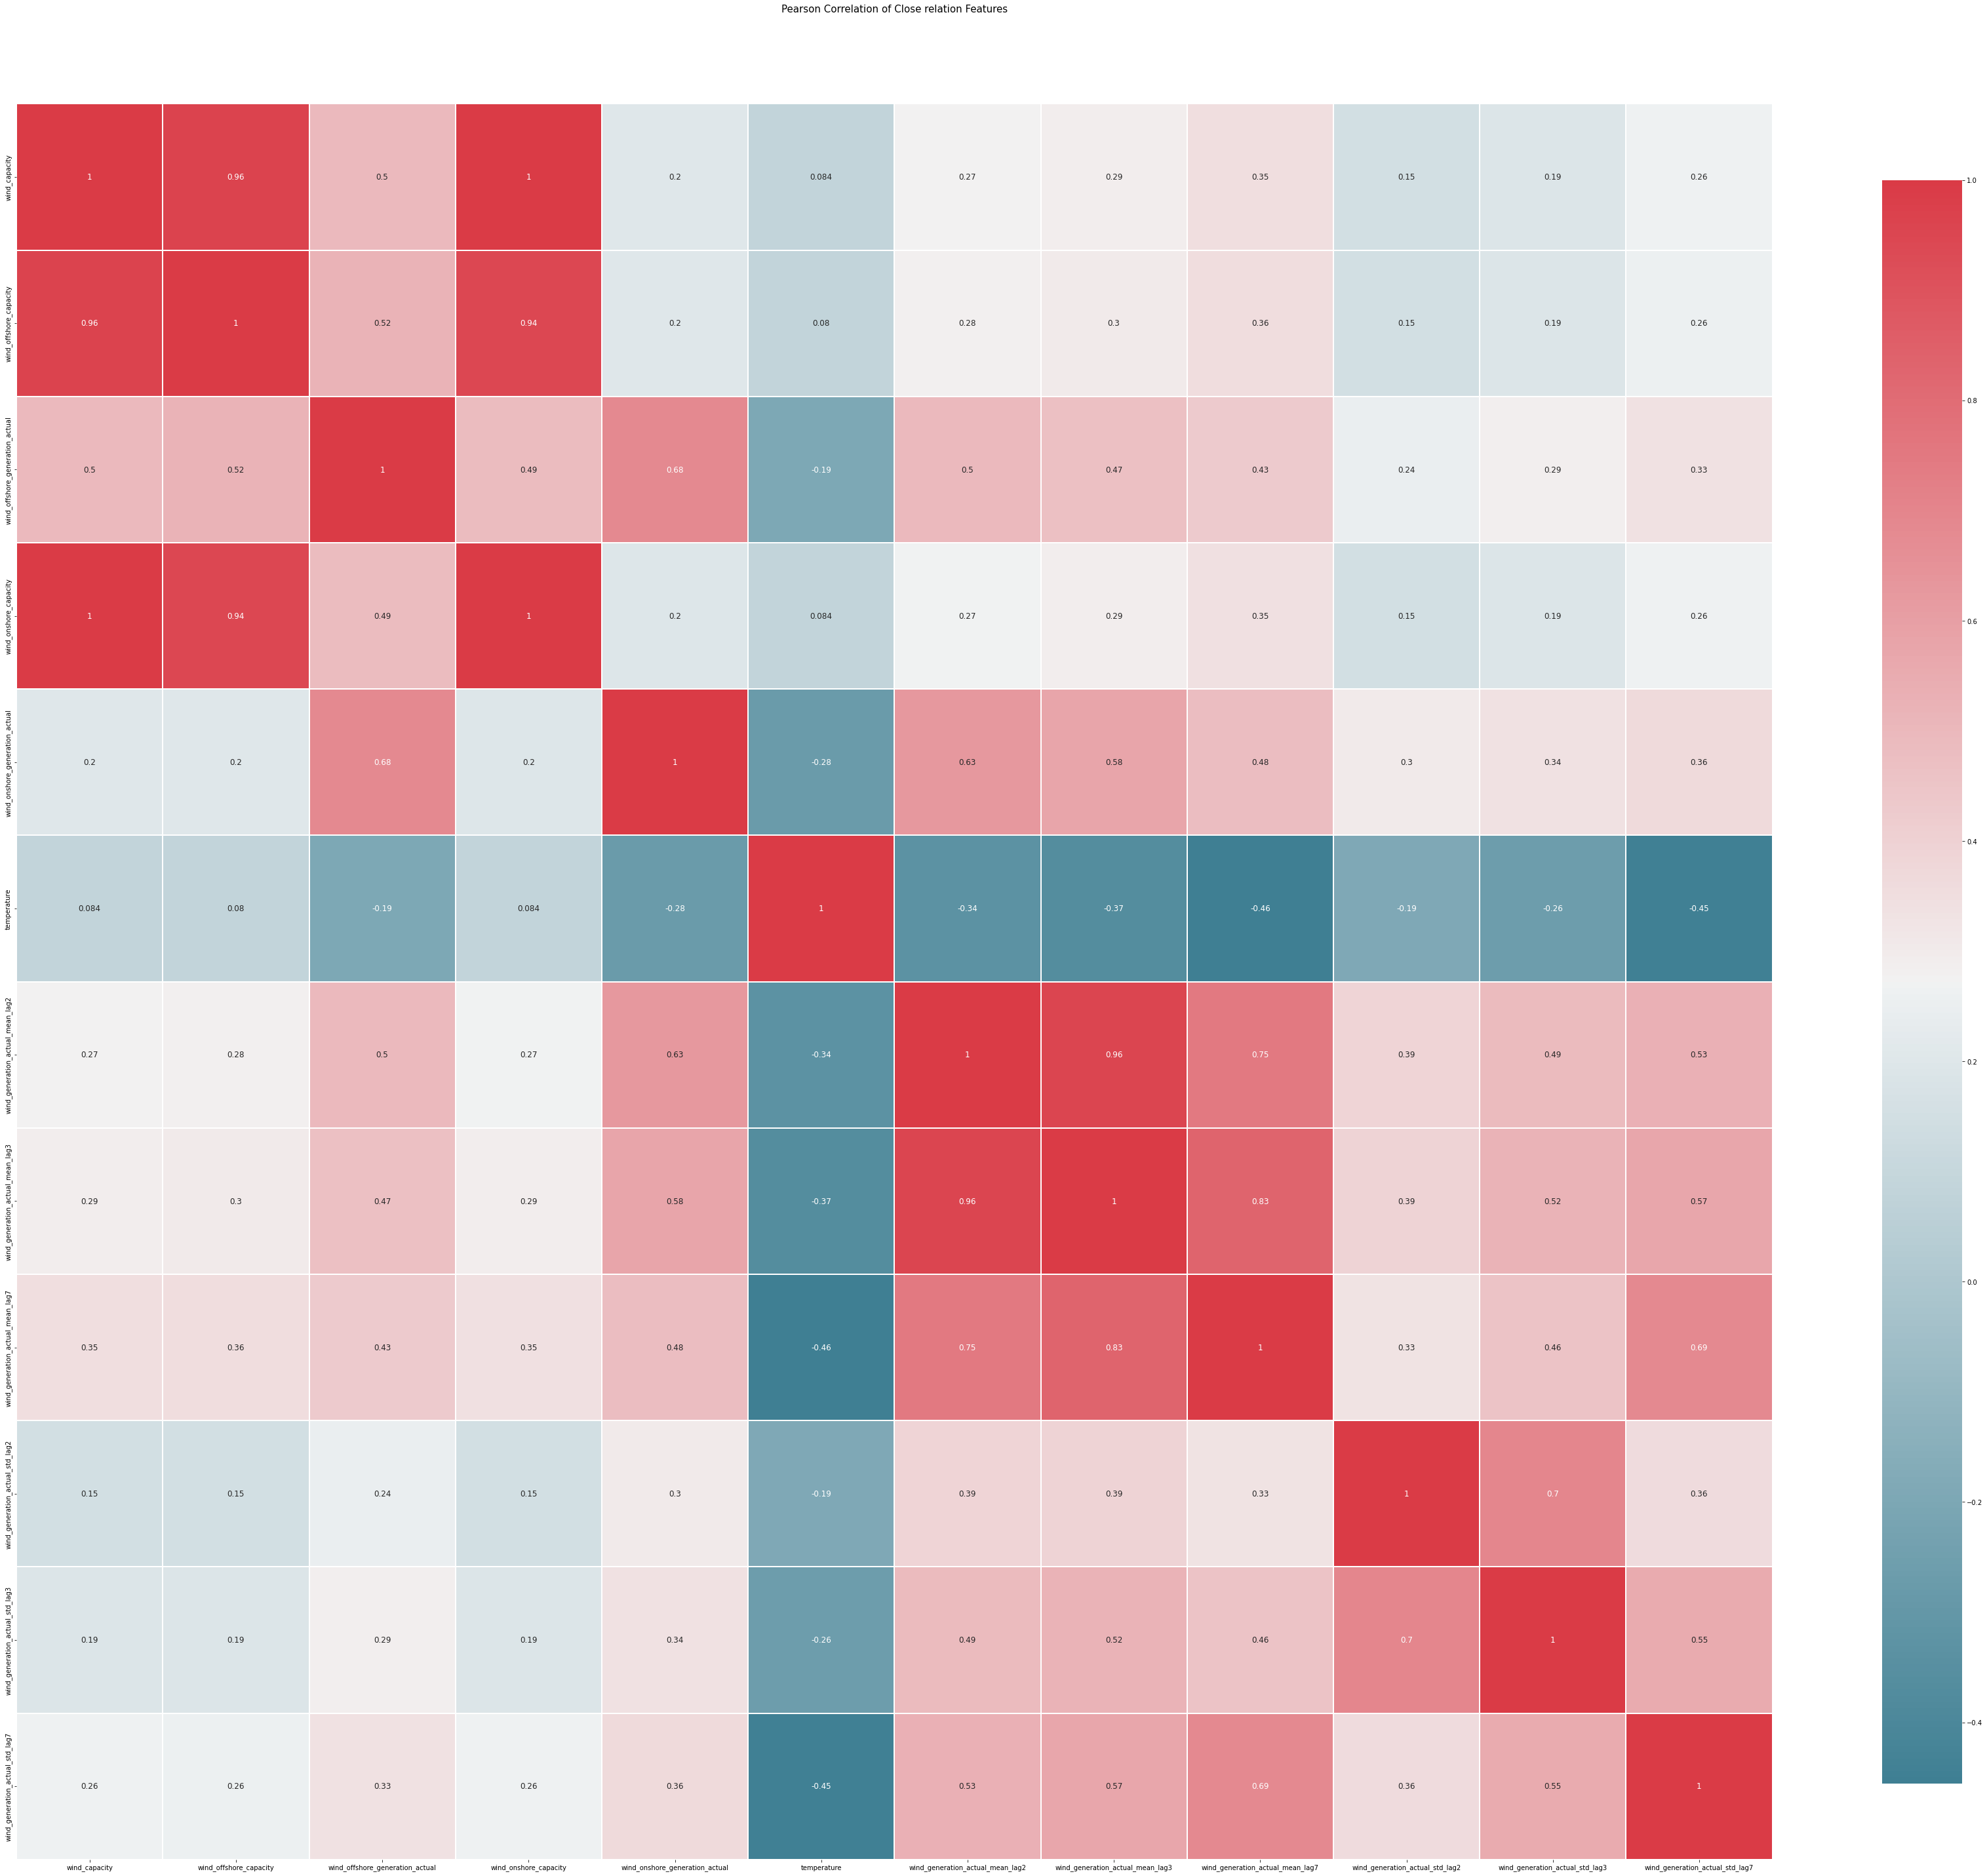

In [22]:


def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(60, 50))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    _ = sns.heatmap(
        df.corr(),
        cmap=colormap,
        square=True,
        cbar_kws={"shrink": 0.9},
        ax=ax,
        annot=True,
        linewidths=0.1,
        vmax=1.0,
        linecolor="white",
        annot_kws={"fontsize": 12},
    )

    plt.title("Pearson Correlation of Close relation Features", y=1.05, size=15)


correlation_heatmap(data_x)


